## Problem 1

```
Imagine that you have the following scenario: you have a file containing some text, in case the text contains the word "error", you want to log it as an error using the ErrorLogger, otherwise, if the text contains the word "file", you should log something in a new file using the FileLogger, otherwise, if its not one of the 2 cases, you need to log something in the console, using the ConsoleLogger. Feel free to simulate the work of the loggers however you wish, you don't even have to actually wrote something in the file, just differentiate the 3 operations in some way. The actions of logging can be simple print statements, they just need to be different for error logs, console logs and file logs. You need to implement this logic using chain of responsibility design pattern and classes of your choice. You may (or may not) use the diagram below as a guide.

Ունենք հետևյալ սցենարը՝ տրված է որոշակի տեքստ պարունակող ֆայլ, եթե տեքստը պարունակում է "error" բառը՝ ուզում ենք log անել որպես error՝ օգտագործելով ErrorLogger, եթե տեքստը պարունակում է "file" բառը՝ ուզում ենք log անել որպես file՝ օգտագործելով FileLogger, հակառակ դեպքում՝ որևէ բան log կանենք console-ում՝  օգտագործելով ConsoleLogger։ Սիմուլյացիա արեք տրված երեք Logger-ների աշխատանքը Ձեր նախընտրելի ձևով, նույնիսկ կարող եք FileLogger-ի դեպքում չօգտագործել որևէ ֆայլ այլ, օրինակ, տպեք որոշակի տեքստ։ Կարևոր է տարբերակում ունենալ այս երեք Logger-երների կատարած գործողությունների միջև։ Իմպլեմենտացրեք այս ծրագիրը գործածելով chain of responsibility design pattern-ը ու Ձեր ընտրությամբ ցանկացած class-ներ։ Ցանկության դեպքում կարող եք նաև առաջնորդվել տրված դիագրամով։
```

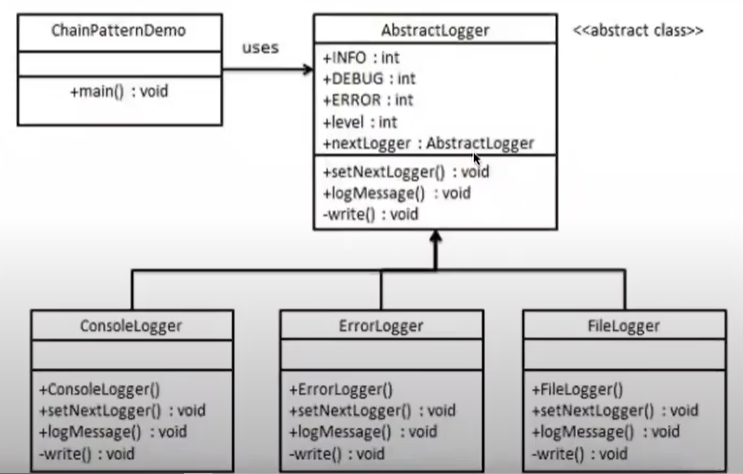

In [5]:
class AbstractLogger(object):
  
  
    def __init__(self, nxt):
  
        self.nxt = nxt
  
    def loge(self, message):
  
        logged = self.write(message)
  
        if not logged:
            self.nxt.loge(message)
  
    def write(self, message):
  
        raise NotImplementedError('First implement it !')
  
  
class ErrorLogger(AbstractLogger):
  
  
    def write(self, message):
  
        if "error" in message:
            print(f"{self.__class__.__name__} - logging the Error message '{message}'")
            return True
                  
        return False
  
  
class FileLogger(AbstractLogger):
  
  
    def write(self, message):
  
        if "file" in message:
            print(f"{self.__class__.__name__} - logging the file '{message}'")
            return True
                  
        return False
  
class ConsoleLogger(AbstractLogger):
  
  
    def write(self, message):
  
        if len(message) !=0:
            print(f"{self.__class__.__name__} - logging the standard message '{message}'")
            return True
                  
        return False
  
class DefaultLogger(AbstractLogger):
  
  
    def write(self, message):
  
        print(f"No available logger to loge the message '{message}'")
        
        return True
  
  
class User:
  
  
    def __init__(self):
  
        initial = None
        d_logger = DefaultLogger(initial)
        cons_logger = ConsoleLogger(d_logger)
        err_logger = ErrorLogger(cons_logger)
        
        self.logger = FileLogger(err_logger)
  
    def agent(self, user_messages):
  
        """Iterates over each meassage and sends them to specific logger"""
  
        for message in user_messages:
            self.logger.loge(message)           


In [6]:
user = User()
massages = ["Message with error", "Message in file", "Other message"]

user.agent(massages)

ErrorLogger - logging the Error message 'Message with error'
FileLogger - logging the file 'Message in file'
ConsoleLogger - logging the standard message 'Other message'


## Problem 2

```
Imagine that you have a customer who wants to order some food, a waiter and a chef. Use command design pattern and classes of your choice to implement this logic. The main operation will be ordering the food, the waiter will decide (depending on the order) if the order should be cooked by the chef or is it something they already have pre-made and should just be served to the client. 

Ունենք հաճախորդ, որը ցանկանում է ուտեստներ պատվիրել, մատուցող ու խոհարար։ Գործածեք command design pattern-ը ու Ձեր ընտրությամբ ցանկացած class-ներ ծրագիրը գրելու համար։ Հիմնական գործողությունը ուտելիք պատվիրելն է, մատուցող, կախված պատվերից, պետք է որոշի թե արդյոք պատվերը պետք է պատրաստվի խոհարարի կողմից, թե դա արդեն նախօրոք պատրաստված ուտեստ է, որն ուղղակի պետք է մատուցվի։ 
```

In [8]:
from abc import ABC, abstractmethod
  
class Command(ABC):

    def __init__(self, receiver):
        self.receiver = receiver
        
    @abstractmethod
    def process(self):
        pass
  
class Order(Command):
      
    def __init__(self, receiver):
        self.receiver = receiver
  
    def process(self):
        self.receiver.implementation()
        
class Receiver(ABC):
      
    @abstractmethod
    def implementation(self):
        pass

class Chef:
      
    def implementation(self):
        print('Chif cookes.')
        
class Baked:
      
    def implementation(self):
        print('Already baked.')
  
class Waiter:
      
    def __init__(self, cmd):
        self.cmd = cmd
  
    def execute(self):
        if 'cook' in self.cmd:
            self.command_impl = Order(Chef())
        else:
            self.command_impl = Order(Baked())
            
        self.command_impl.process()

In [9]:
waiter = Waiter('please cook a dish')
waiter.execute()

Chif cookes.


In [10]:
waiter = Waiter('a cake please')
waiter.execute()

Already baked.
